In [1]:
# --- IMPORT LIBRARIES ---
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [4]:
# --- LOAD DATA ---
df = pd.read_csv(r"C:\Users\nosha\OneDrive\Desktop\New folder\customer-segmentation-kmeans\data\Mall_Customers.csv")

# Preview
display(df.head())
df.info()
df.describe()
df.isnull().sum()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

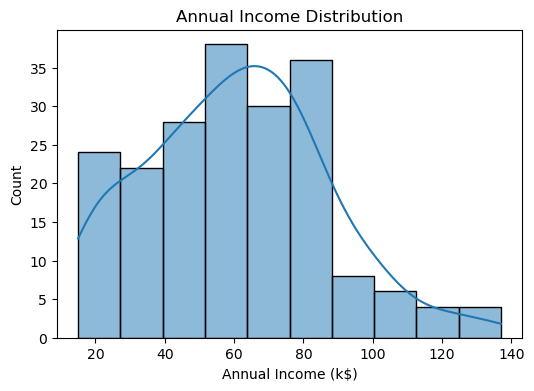

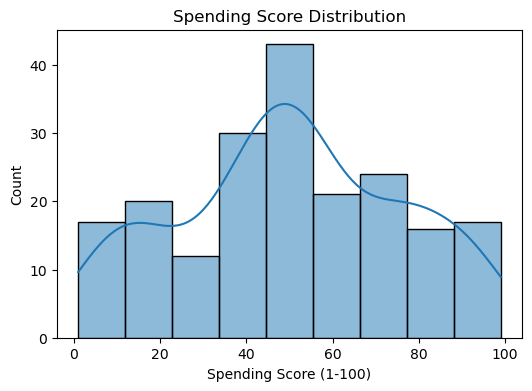

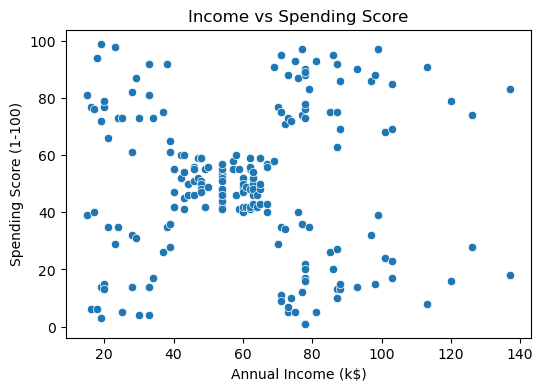

In [5]:
# --- EDA ---
plt.figure(figsize=(6,4))
sns.histplot(df["Annual Income (k$)"], kde=True)
plt.title("Annual Income Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df["Spending Score (1-100)"], kde=True)
plt.title("Spending Score Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=df)
plt.title("Income vs Spending Score")
plt.show()

c:\Users\nosha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nosha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nosha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nosha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

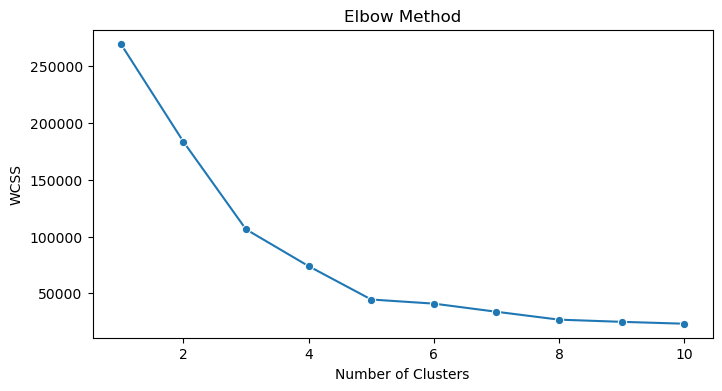

In [6]:
# --- SELECT FEATURES ---
X = df[["Annual Income (k$)", "Spending Score (1-100)"]].values

# --- ELBOW METHOD ---
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,4))
sns.lineplot(x=range(1, 11), y=wcss, marker="o")
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [7]:
# --- FINAL MODEL ---
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=42)
y = kmeans.fit_predict(X)

df["Cluster"] = y

c:\Users\nosha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


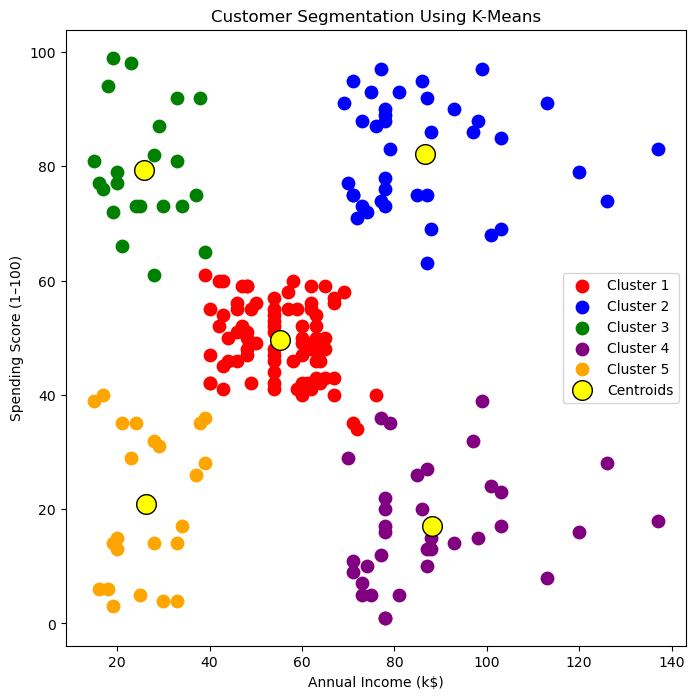

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


In [8]:
# --- VISUALIZE CLUSTERS ---
plt.figure(figsize=(8,8))
colors = ["red", "blue", "green", "purple", "orange"]

for i in range(5):
    plt.scatter(X[y == i, 0], X[y == i, 1], 
                s=80, c=colors[i], label=f"Cluster {i+1}")

plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            s=200, c="yellow", edgecolor="black", label="Centroids")

plt.title("Customer Segmentation Using K-Means")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1–100)")
plt.legend()
plt.show()

# Display sample of cluster assignments
df.head()